**Zadanie 3**

Z gotowej partii pewnego wyrobu pobrano 9 elementów i zmierzono średnicę każdego z wylosowanych elementów. Otrzymano próbę elementy=[19 17.37 20 18 20.63 18 20 18 20 ]. Zmierzone średnice mają rozkład normalny. Proszę sprawdzić na poziomie istotności 0.01 czy odchylenie standardowe w populacji może wynosić 3 mm?                              
Przed nami model do analizy.

Ho: sigma^2=9      
H1: sigma < 3 ? ( wystarczy jedna jednostronna H1)

alfa= 0.01

In [6]:
# do policzenia średnia i odchylenie standardowe, aby możliwe było wybranie H1
import numpy as np
elementy=[19, 17.37, 20, 18, 20.63, 18, 20, 18, 20 ]
x_SR= np.mean(elementy)
sigma = np.std(elementy)
print('wartość średnia=',x_SR)
print('odchylenie standardowe=',sigma)


wartość średnia= 19.0
odchylenie standardowe= 1.1211997542315502


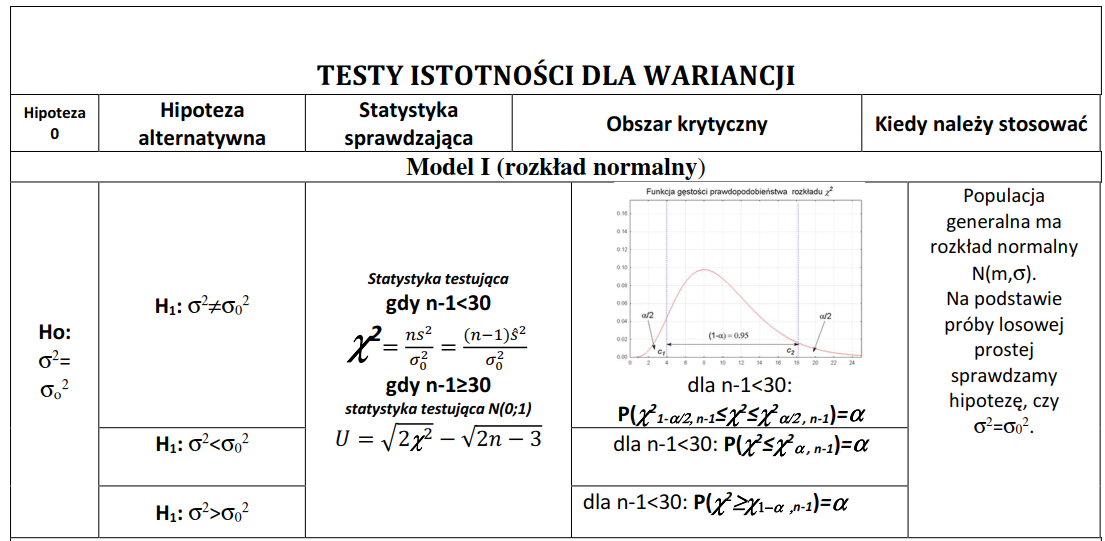

# Rozwiązanie za pomocą testu / obszarów krytycznych
Test trzeba sobie samemu napisać - bo nijak nie mogę go znaleźć w Internecie ( a jest w Matlabie :) )
Przedstawiona poniżej funkcja  jest rozwiązaniem za pomocą obszarów krytycznych, ale jest i dobrym początkiem do wyliczenia wartości p.


#Rozwiązanie za pomocą obszarów krytycznych.
Proszę zmienić funkcję tak, aby wypisywała statystykę oraz obszary krytyczne.
Działała dla odpowiedniego alfa. Proszę funkcję uruchomić zgodnie z założonym H1.

In [7]:
import numpy as np
from scipy.stats import chi2

def var_test(x, va0, direction = "dwustronny", alpha = 0.05):
   n = len(x)
   Q = (n - 1) * np.var(x,ddof=1) / va0 
   #
   print('Statystyka jest równa:',Q)
   if direction == "lewostronny":
        q = chi2.ppf(alpha, n - 1)
        #
        print('obszar krytyczny od 0 do', q)
        if Q <= q:
            return "H_0 odrzucona"
        else:
            return "H_0 nie odrzucona"
   elif direction == "prawostronny":
        q = chi2.ppf(1 - alpha, n - 1)
        #
        print('obszar krytyczny od ',q, 'do nieskończoności')
        if Q >= q:
            return "H_0 odrzucona"
        else:
            return "H_0 nie odrzucona"
   else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
         #
        print('obszar krytyczny od zera do ',q1)
         #
        print('obszar krytyczny  od ',q2 , 'do nieskońconości')
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"

n = len(elementy)    
var_test(elementy, va0 = 9,direction = "lewostronny",alpha = 0.01)

Statystyka jest równa: 1.2570888888888883
obszar krytyczny od 0 do 1.6464973726907703


'H_0 odrzucona'

#Rozwiązanie za pomocą wartości p

In [8]:
stat=1.2571
# proszę wyliczyć wartość p
import scipy.stats as stats 
p = 1-stats.norm.pdf(stat)
print(p)

0.8189693161778671


# Wnioskowanie dotyczące i obszarów krytycznych i wartości p:
czyli Ho czy H1


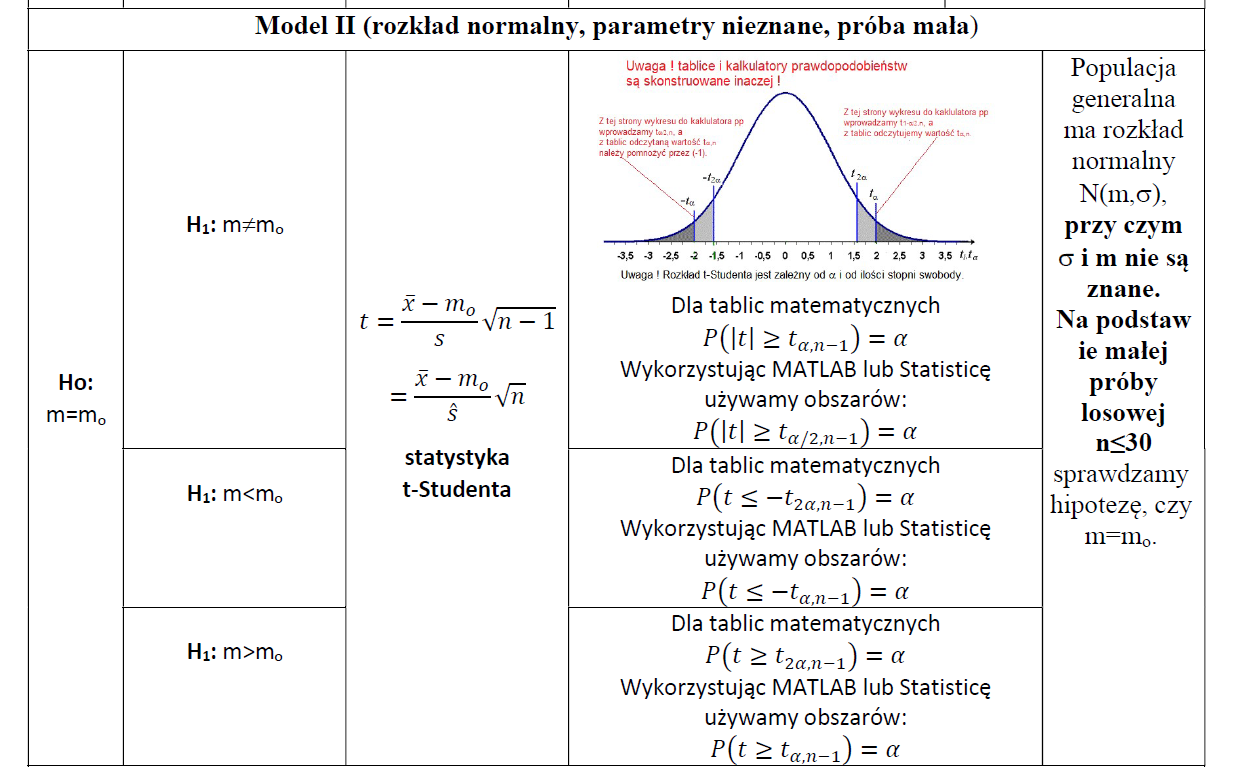

# Proszę sprawdzić, czy średnia może wynosić 17.5.
Ho:

H1:

alfa:

wnioskowanie, czyli, czy H1, czy H0

In [9]:
import scipy 
from scipy import stats

#to jest zabawne, bo w opisie jest, ale nie da się wykorzystać: alternative{‘two-sided’, ‘less’, ‘greater’}, optional
stat,p=scipy.stats.ttest_1samp(elementy, 17.5)
print (['stat=',stat, 'p=', p])

from scipy.stats import t
#jeśli dwustronne p  wynosi
p_val_both = 2*(1 - t.cdf(stat,len(elementy)-1))
print(p_val_both)

# to ile wynosi jednostronne p


# obszary krytyczne


['stat=', 3.784018566813827, 'p=', 0.005357338988112979]
0.00535733898811297


Wnioskowanie ⁉


# Tam gdzie ma to sens i jest taka możliwość proszę policzyć moc testu.

In [10]:
#tt_ind_solve_power()